In [7]:
from bisip import mcmcinv
import matplotlib.pyplot as plt
import numpy as np
import os

In [5]:
# To automatically save traces in txt files use the keep_traces=True keyword in mcmcinv()
# See below

""" 1.
    Model to use ?"""
model = "ColeCole" # ColeCole model


""" 2.
    Paths to files ?"""
filepath = "/Users/Charles/Documents/SIP dat files/AVG_SIP-Reciprocals_K389160.dat"

""" 3.
    The data file has many headers and the phase units are mrad"""
skip_rows = 3
units = "mrad"

""" 4.
    Markov Chain Monte Carlo parameters ?"""
mcmc = {"adaptive"   : False,
        "nb_chain"   : 1,
        "nb_iter"    : 10000,
        "nb_burn"    : 8000,
        "thin"       : 1,
        "tune_inter" : 100,
        "prop_scale" : 1.0,
        "verbose"    : False,
        "cov_inter"  : 1000,
        "cov_delay"  : 10000,
        }
    
# This will start the inversion.
# Note that polynomial order used for the decomposition is 4 and the c exponent is 1.0 (Debye)
# Add keep_traces=True here
sol = mcmcinv(model, filepath, mcmc=mcmc, headers=skip_rows, ph_units=units, cc_modes=2, keep_traces=True)
# The inversion class is stored in sol



MCMC parameters:
 {'adaptive': False, 'nb_chain': 1, 'nb_iter': 10000, 'nb_burn': 8000, 'thin': 1, 'tune_inter': 100, 'prop_scale': 1.0, 'verbose': False, 'cov_inter': 1000, 'cov_delay': 10000}

Chain #1/1
 [-----------------100%-----------------] 10000 of 10000 complete in 2.0 sec

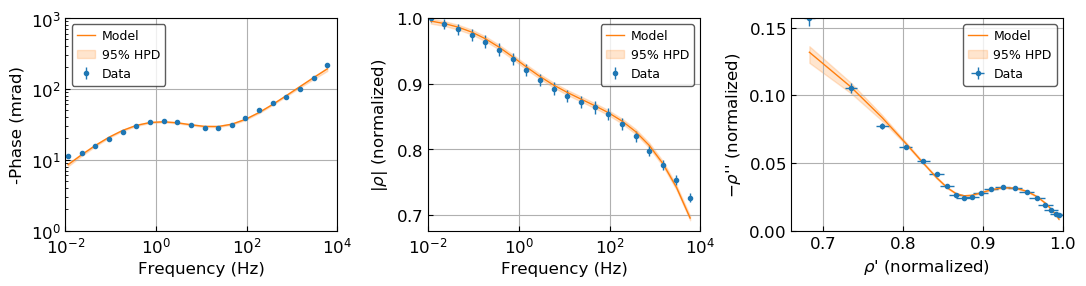

In [20]:
sol.plot_fit() # See the fit, and this time we want to save it

In [21]:
# It's fitted

In [22]:
# We can check that the traces have been saved by the keyword keep_traces=True
os.listdir()

['.DS_Store',
 '.ipynb_checkpoints',
 'Example1 - First inversion.ipynb',
 'Example2 - MCMC parameters.ipynb',
 'Example3 - Estimating noise levels in the data.ipynb',
 'Example4 - Save traces to csv.ipynb',
 'Example5 - Save traces automatically.ipynb',
 'Figures',
 'Help.ipynb',
 'traceofparameters.csv',
 'Txt traces']

In [19]:
# It's in the folder Txt traces follow the path to it
os.listdir('./Txt traces/20180308/AVG_SIP-Reciprocals_K389160/ColeCole-AVG_SIP-Reciprocals_K389160-20180308_105254/Chain_0')

['c.txt',
 'deviance.txt',
 'log_tau.txt',
 'm.txt',
 'Metropolis_c_adaptive_scale_factor.txt',
 'Metropolis_log_tau_adaptive_scale_factor.txt',
 'Metropolis_m_adaptive_scale_factor.txt',
 'Metropolis_R0_adaptive_scale_factor.txt',
 'R0.txt',
 'zmod.txt']

In [ ]:
# Leaving keep_traces=True when doing many inversions will quickly use up a LOT of disk space